In [1]:
import findspark
findspark.init("C:\\spark")

In [2]:
from pyspark import SparkContext
sc = SparkContext()

dataset: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

In [3]:
rdd = sc.textFile(".\\Pyspark_Movie_Data\\movie_metadata.csv")

In [4]:
rdd.map(lambda x: len(x.split(","))).map(lambda x: (x, 1)).countByKey()

defaultdict(int, {28: 4975, 29: 61, 30: 6, 31: 2})

dataseti virgule gore ayirinca bazi anomaliler olusuyor. o yuzden once http ye gore ayirip sonra ihtiyaca gore split yapariz. 

## Hangi ulkenin kac filmi ilk 5bin film arasinda?

In [5]:
header = rdd.first()
header

'color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes'

In [6]:
rdd1 = rdd.filter(lambda x: x != header)
rdd1 = rdd1.map(lambda x: x.split("http"))
rdd1 = rdd1.map(lambda x: (x[1].split(",")[3], 1))
rdd1.collect()

[('USA', 1),
 ('USA', 1),
 ('UK', 1),
 ('USA', 1),
 ('', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('UK', 1),
 ('USA', 1),
 ('USA', 1),
 ('UK', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('New Zealand', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('New Zealand', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('UK', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('Canada', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('Australia', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA', 1),
 ('USA'

In [8]:
rdd1.reduceByKey(lambda x, y: x+y).sortBy(lambda x: -x[1]).collect()

[('USA', 3807),
 ('UK', 448),
 ('France', 154),
 ('Canada', 126),
 ('Germany', 97),
 ('Australia', 55),
 ('India', 34),
 ('Spain', 33),
 ('China', 30),
 ('Japan', 23),
 ('Italy', 23),
 ('Mexico', 17),
 ('Hong Kong', 17),
 ('New Zealand', 15),
 ('South Korea', 14),
 ('Ireland', 12),
 ('Denmark', 11),
 ('Russia', 11),
 ('South Africa', 8),
 ('Norway', 8),
 ('Brazil', 8),
 ('Sweden', 6),
 ('', 5),
 ('Netherlands', 5),
 ('Thailand', 5),
 ('Poland', 5),
 ('Belgium', 4),
 ('Iran', 4),
 ('Argentina', 4),
 ('Romania', 4),
 ('Israel', 4),
 ('Iceland', 3),
 ('Switzerland', 3),
 ('Czech Republic', 3),
 ('West Germany', 3),
 ('Hungary', 2),
 ('Greece', 2),
 ('Taiwan', 2),
 ('Soviet Union', 1),
 ('Peru', 1),
 ('Aruba', 1),
 ('Libya', 1),
 ('Cambodia', 1),
 ('Slovakia', 1),
 ('Nigeria', 1),
 ('Finland', 1),
 ('Pakistan', 1),
 ('Slovenia', 1),
 ('Kenya', 1),
 ('Philippines', 1),
 ('New Line', 1),
 ('Chile', 1),
 ('Panama', 1),
 ('Official site', 1),
 ('Bulgaria', 1),
 ('Georgia', 1),
 ('Turkey', 1),


## Her ulkenin ortalama IMDB puanina gore siralayiniz.

In [9]:
rdd2 = sc.textFile(".\\Pyspark_Movie_Data\\movie_metadata.csv")
header = rdd2.first()
rdd2 = rdd2.filter(lambda x: x != header)
rdd2 = rdd2.map(lambda x: x.split("http"))
rdd2 = rdd2.map(lambda x: (x[1].split(",")[3], float(x[1].split(",")[8])))

In [16]:
rdd2.collect()[:10]

[('USA', 7.9),
 ('USA', 7.1),
 ('UK', 6.8),
 ('USA', 8.5),
 ('', 7.1),
 ('USA', 6.6),
 ('USA', 6.2),
 ('USA', 7.8),
 ('USA', 7.5),
 ('UK', 7.5)]

In [20]:
country_point = rdd2.combineByKey((lambda x: (x, 1)),
                                 (lambda x, y: (x[0] + y, x[1] +1)),
                                 (lambda x, y: (x[0] + y[0], x[1] + y[1])))
country_point.collect()[:10]

[('USA', (24240.80000000004, 3807)),
 ('', (34.0, 5)),
 ('Australia', (358.29999999999995, 55)),
 ('Belgium', (22.4, 4)),
 ('China', (198.70000000000005, 30)),
 ('France', (1028.5, 154)),
 ('Mexico', (115.19999999999999, 17)),
 ('India', (222.10000000000002, 34)),
 ('Soviet Union', (8.1, 1)),
 ('South Korea', (87.60000000000001, 14))]

In [21]:
country_avg = country_point.map(lambda country: (country[0], country[1][0]/country[1][1]))
country_avg.collect()[:10]

[('USA', 6.367428421329141),
 ('', 6.8),
 ('Australia', 6.514545454545454),
 ('Belgium', 5.6),
 ('China', 6.623333333333335),
 ('France', 6.678571428571429),
 ('Mexico', 6.776470588235293),
 ('India', 6.532352941176471),
 ('Soviet Union', 8.1),
 ('South Korea', 6.257142857142858)]

In [25]:
country_avg.sortBy(lambda x: -x[1]).collect()[:10]

[('Kyrgyzstan', 8.7),
 ('Libya', 8.4),
 ('United Arab Emirates', 8.2),
 ('Soviet Union', 8.1),
 ('Egypt', 8.1),
 ('Iran', 7.725),
 ('Poland', 7.62),
 ('Indonesia', 7.6),
 ('Israel', 7.5249999999999995),
 ('Sweden', 7.516666666666666)]

## Her yonetmeni ortalama IMDB puanina ve ilk5bine giren film sayisina gore siralayiniz.

In [26]:
rdd3 = sc.textFile(".\\Pyspark_Movie_Data\\movie_metadata.csv")
header = rdd3.first()
rdd3 = rdd3.filter(lambda x: x != header)
rdd3 = rdd3.map(lambda x: x.split("http"))
rdd3 = rdd3.map(lambda x: (x[0].split(",")[1], float(x[1].split(",")[-3])))
rdd3.collect()[:10]

[('James Cameron', 7.9),
 ('Gore Verbinski', 7.1),
 ('Sam Mendes', 6.8),
 ('Christopher Nolan', 8.5),
 ('Doug Walker', 7.1),
 ('Andrew Stanton', 6.6),
 ('Sam Raimi', 6.2),
 ('Nathan Greno', 7.8),
 ('Joss Whedon', 7.5),
 ('David Yates', 7.5)]

In [30]:
director_point = rdd3.combineByKey(lambda x: (x, 1),
                                 (lambda x, y: (x[0] + y, x[1] +1)),
                                 (lambda x, y: (x[0] + y[0], x[1] + y[1])))
director_point.collect()[:10]

[('James Cameron', (55.4, 7)),
 ('Gore Verbinski', (48.9, 7)),
 ('Sam Mendes', (60.0, 8)),
 ('Andrew Stanton', (23.2, 3)),
 ('Nathan Greno', (7.8, 1)),
 ('Joss Whedon', (31.7, 4)),
 ('David Yates', (28.200000000000003, 4)),
 ('Zack Snyder', (57.4, 8)),
 ('Rob Marshall', (33.0, 5)),
 ('Ridley Scott', (120.19999999999999, 17))]

In [32]:
movie_count = director_point.map(lambda x: (x[0], x[1][1]))
movie_count.sortBy(lambda x: -x[1]).collect()[:10]

[('', 104),
 ('Steven Spielberg', 26),
 ('Woody Allen', 22),
 ('Martin Scorsese', 20),
 ('Clint Eastwood', 20),
 ('Ridley Scott', 17),
 ('Tim Burton', 16),
 ('Steven Soderbergh', 16),
 ('Spike Lee', 16),
 ('Renny Harlin', 15)]

In [33]:
director_point_average = director_point.map(lambda x: (x[0], x[1][0] /x[1][1]))
director_point_average.sortBy(lambda x: -x[1]).collect()[:20]

[('John Blanchard', 9.5),
 ('Mitchell Altieri', 8.7),
 ('Sadyk Sher-Niyaz', 8.7),
 ('Cary Bell', 8.7),
 ('Mike Mayhall', 8.6),
 ('Charles Chaplin', 8.6),
 ('Raja Menon', 8.5),
 ('Ron Fricke', 8.5),
 ('Damien Chazelle', 8.5),
 ('Majid Majidi', 8.5),
 ('Sergio Leone', 8.475),
 ('Christopher Nolan', 8.425),
 ('Moustapha Akkad', 8.4),
 ('Richard Marquand', 8.4),
 ('Catherine Owens', 8.4),
 ('Rakeysh Omprakash Mehra', 8.4),
 ('Robert Mulligan', 8.4),
 ('Asghar Farhadi', 8.4),
 ('Marius A. Markevicius', 8.4),
 ('S.S. Rajamouli', 8.4)]

## Yonetmenleri agirlikli ortalama IMDB puanlarina gore siralayiniz.

In [35]:
director_ağırlıklı_puan = director_point.map(lambda x: (x[0] , round((x[1][0]/x[1][1])*.85 + x[1][1]/26*.25, 2)))
director_ağırlıklı_puan.sortBy(lambda x: -x[1]).collect()[:20]

[('John Blanchard', 8.08),
 ('', 7.42),
 ('Mitchell Altieri', 7.4),
 ('Sadyk Sher-Niyaz', 7.4),
 ('Cary Bell', 7.4),
 ('Mike Mayhall', 7.32),
 ('Charles Chaplin', 7.32),
 ('Sergio Leone', 7.24),
 ('Christopher Nolan', 7.24),
 ('Raja Menon', 7.23),
 ('Ron Fricke', 7.23),
 ('Damien Chazelle', 7.23),
 ('Majid Majidi', 7.23),
 ('Moustapha Akkad', 7.15),
 ('Richard Marquand', 7.15),
 ('Catherine Owens', 7.15),
 ('Rakeysh Omprakash Mehra', 7.15),
 ('Robert Mulligan', 7.15),
 ('Asghar Farhadi', 7.15),
 ('Marius A. Markevicius', 7.15)]

## En cok hangi turde film ilk 5bine girmistir?

In [38]:
rdd4 = sc.textFile(".\\Pyspark_Movie_Data\\movie_metadata.csv")
rdd4 = rdd4.filter(lambda x: x != header)
rdd4 = rdd4.map(lambda x: x.split("http"))
rdd4 = rdd4.map(lambda x: (x[0].split(",")[9], 1))
rdd4 = rdd4.reduceByKey(lambda x, y: x + y).sortBy(lambda x: -x[1])
rdd4.collect()[:20]

[('Drama', 236),
 ('Comedy', 209),
 ('Comedy|Drama', 191),
 ('Comedy|Drama|Romance', 187),
 ('Comedy|Romance', 158),
 ('Drama|Romance', 152),
 ('Crime|Drama|Thriller', 101),
 ('Horror', 71),
 ('Action|Crime|Drama|Thriller', 68),
 ('Action|Crime|Thriller', 65),
 ('Drama|Thriller', 64),
 ('Crime|Drama', 63),
 ('Horror|Thriller', 56),
 ('Crime|Drama|Mystery|Thriller', 55),
 ('Documentary', 51),
 ('Comedy|Crime', 51),
 ('Action|Adventure|Sci-Fi', 51),
 ('Action|Adventure|Thriller', 46),
 ('Drama|Mystery|Thriller', 37),
 ('Action|Adventure|Sci-Fi|Thriller', 35)]

In [39]:
rdd4 = sc.textFile(".\\Pyspark_Movie_Data\\movie_metadata.csv")
rdd4 = rdd4.filter(lambda x: x != header)
rdd4 = rdd4.map(lambda x: x.split("http"))
rdd4 = rdd4.flatMap(lambda x: (x[0].split(",")[9].split("|")))
rdd4.collect()[:20]

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Thriller',
 'Action',
 'Thriller',
 'Documentary',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Romance',
 'Adventure']

## En fazla butceye ve gelire sahip ilk 20 filmi siralayiniz.

In [97]:
rdd5 = sc.textFile(".\\Pyspark_Movie_Data\\movie_metadata.csv")
rdd5 = rdd5.filter(lambda x: x != header)
rdd5 = rdd5.map(lambda x: x.split("http")).filter(lambda x: x[0].split(",")[8] !='').filter(lambda x: x[1].split(",")[5] !='')
revenues = rdd5.map(lambda x: (x[0].split(",")[11], int(x[0].split(',')[8]))).sortBy(lambda x: -x[1])
for i, j in enumerate(revenues.take(20)): print(i+1, j)

1 ('Avatar\xa0', 760505847)
2 ('Titanic\xa0', 658672302)
3 ('Jurassic World\xa0', 652177271)
4 ('The Avengers\xa0', 623279547)
5 ('The Avengers\xa0', 623279547)
6 ('The Dark Knight\xa0', 533316061)
7 ('Star Wars: Episode I - The Phantom Menace\xa0', 474544677)
8 ('Star Wars: Episode IV - A New Hope\xa0', 460935665)
9 ('Avengers: Age of Ultron\xa0', 458991599)
10 ('The Dark Knight Rises\xa0', 448130642)
11 ('Shrek 2\xa0', 436471036)
12 ('E.T. the Extra-Terrestrial\xa0', 434949459)
13 ('The Hunger Games: Catching Fire\xa0', 424645577)
14 ("Pirates of the Caribbean: Dead Man's Chest\xa0", 423032628)
15 ('The Lion King\xa0', 422783777)
16 ('Toy Story 3\xa0', 414984497)
17 ('Iron Man 3\xa0', 408992272)
18 ('The Hunger Games\xa0', 407999255)
19 ('Captain America: Civil War\xa0', 407197282)
20 ('Spider-Man\xa0', 403706375)


In [98]:
budget = rdd5.map(lambda x: (x[0].split(",")[11], int(x[1].split(',')[5]))).sortBy(lambda x: -x[1])
for i, j in enumerate(budget.take(20)): print(i+1, j)

1 ('The Host\xa0', 12215500000)
2 ('Lady Vengeance\xa0', 4200000000)
3 ('Fateless\xa0', 2500000000)
4 ('Princess Mononoke\xa0', 2400000000)
5 ('Steamboy\xa0', 2127519898)
6 ('Akira\xa0', 1100000000)
7 ('Godzilla 2000\xa0', 1000000000)
8 ('Kabhi Alvida Naa Kehna\xa0', 700000000)
9 ('Tango\xa0', 700000000)
10 ('Kites\xa0', 600000000)
11 ('Red Cliff\xa0', 553632000)
12 ('The Legend of Suriyothai\xa0', 400000000)
13 ('The Messenger: The Story of Joan of Arc\xa0', 390000000)
14 ("Pirates of the Caribbean: At World's End\xa0", 300000000)
15 ('Ong-bak 2\xa0', 300000000)
16 ('John Carter\xa0', 263700000)
17 ('Tangled\xa0', 260000000)
18 ('Spider-Man 3\xa0', 258000000)
19 ('Spider-Man 3\xa0', 258000000)
20 ('The Dark Knight Rises\xa0', 250000000)


## En fazla butceye sahip olan film en fazla gelire de sahip mi karsilastiriniz.

In [99]:
import pandas as pd
df= pd.DataFrame()
for i, j in enumerate(revenues.take(21)):
    df.loc[i,['movie_title','revenue']] = [str(j[0]), int(j[1])]
    
for i, j in enumerate(budget.take(5000)):
    index = df[df.movie_title==str(j[0])].index
    df.loc[index,['movie_title','budget']] = [str(j[0]), int(j[1])]
df  

,movie_title,revenue,budget
0,Avatar,760505847.0,237000000.0
1,Titanic,658672302.0,200000000.0
2,Jurassic World,652177271.0,150000000.0
3,The Avengers,623279547.0,220000000.0
4,The Avengers,623279547.0,220000000.0
5,The Dark Knight,533316061.0,185000000.0
6,Star Wars: Episode I - The Phantom Menace,474544677.0,115000000.0
7,Star Wars: Episode IV - A New Hope,460935665.0,11000000.0
8,Avengers: Age of Ultron,458991599.0,250000000.0
9,The Dark Knight Rises,448130642.0,250000000.0


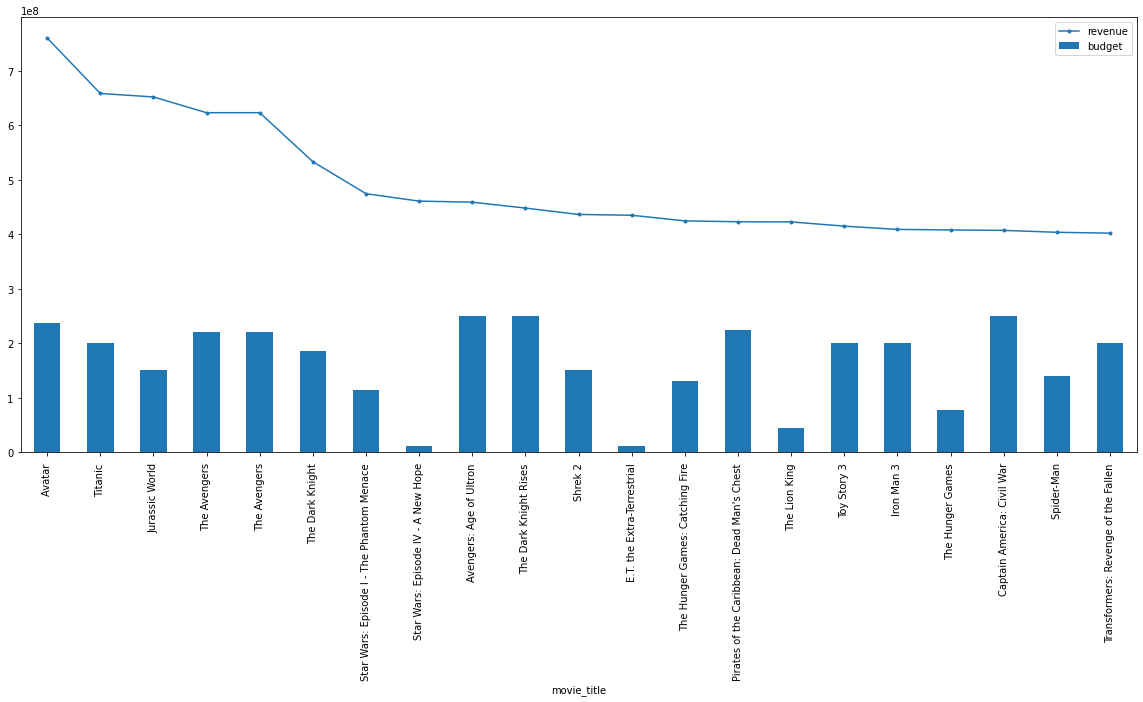

In [105]:
import matplotlib.pyplot as plt

plt.figure (figsize=(20,8))
df = df.set_index("movie_title")
ax = df['revenue'].plot(style='.-')
df['budget'].plot.bar(ax=ax)
ax.legend();